In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

In [2]:
raw_data = np.genfromtxt('Petrol.csv',dtype='str',delimiter=',',skip_header=1,skip_footer=0)
for i in range(len(raw_data)):
    raw_data[i][1] = raw_data[i][1][1]

In [3]:
X = np.array([((int(i[0])-2001)*4+int(i[1])) for i in raw_data])
y = np.array([float(i) for i in raw_data[:,2]])

In [4]:
data = pd.read_csv('Petrol.csv',dtype={'Year': 'str', 'Quarter': 'str', 'Consumption': 'float'})
data.index = pd.DatetimeIndex(data.Year+data.Quarter).to_period('Q')
del data['Year']
del data['Quarter']
tr_data = data[:int(len(data)*0.7)]
val_data = data[int(len(data)*0.7):]

C:\Users\subbu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


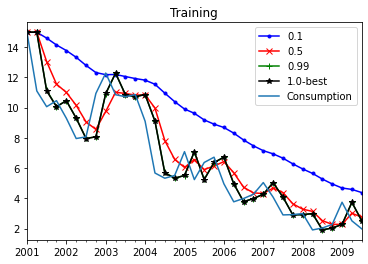

In [17]:
fit1 = SimpleExpSmoothing(tr_data).fit(smoothing_level=0.1,optimized=False)
#fcast1 = fit1.forecast(10).rename('0.1')
fit1.fittedvalues.plot(marker='.',  color='blue')

fit5 = SimpleExpSmoothing(tr_data).fit(smoothing_level=0.5,optimized=False)
fit5.fittedvalues.plot(marker='x',  color='red')

fit9 = SimpleExpSmoothing(tr_data).fit(smoothing_level=0.99,optimized=False)
fit9.fittedvalues.plot(marker='+',  color='green')

fit_best = SimpleExpSmoothing(tr_data).fit(optimized=True)
ax = fit_best.fittedvalues.plot(marker='*', color='black')

plt.legend(["0.1", "0.5","0.99",str(fit_best.model.params['smoothing_level'])+'-best'], loc ="best") 

tr_data.plot(ax = ax)
plt.title('Training')
plt.show()

In [18]:
# MSE and MAPE TESTING
fcast_best = fit_best.forecast(len(val_data)).rename('best')
mse_best = ((fcast_best - val_data.Consumption) ** 2).mean()
mape = ((fcast_best - val_data.Consumption))
for i in range(len(mape)):
    mape[i] = (mape[i]/val_data.Consumption[i])*100
print('best',mse_best,mape.mean())
fcast1 = fit1.forecast(len(val_data)).rename('0.1')
mse1 = ((fcast1 - val_data.Consumption) ** 2).mean()
mape = ((fcast1 - val_data.Consumption))
for i in range(len(mape)):
    mape[i] = (mape[i]/val_data.Consumption[i])*100
print('0.1',mse1,mape.mean())
fcast5 = fit5.forecast(len(val_data)).rename('0.5')
mse5= ((fcast5 - val_data.Consumption) ** 2).mean()
mape = ((fcast5 - val_data.Consumption))
for i in range(len(mape)):
    mape[i] = (mape[i]/val_data.Consumption[i])*100
print('0.5',mse5,mape.mean())
fcast9 = fit9.forecast(len(val_data)).rename('0.99')
mse9 = ((fcast9 - val_data.Consumption) ** 2).mean()
mape = ((fcast9 - val_data.Consumption))
for i in range(len(mape)):
    mape[i] = (mape[i]/val_data.Consumption[i])*100
print('0.99',mse9,mape.mean())

best 0.8809608582000004 93.97524806439925
0.1 9.432183057399769 305.3026090487542
0.5 1.733476363680799 132.05998528947532
0.99 0.8907356499570077 94.50460480680182


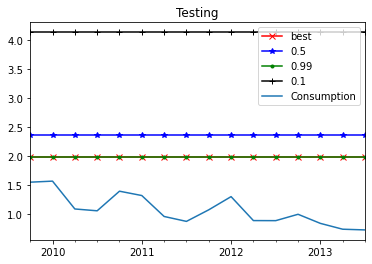

In [19]:
ax = fcast_best.plot(color='red', marker="x", legend=True)
fcast5.plot(color='blue', marker="*", legend=True)
fcast9.plot(color='green', marker=".", legend=True)
fcast1.plot(color='black', marker="+", legend=True)
val_data.plot(ax=ax)
plt.title('Testing')
plt.show()

C:\Users\subbu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\subbu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\subbu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


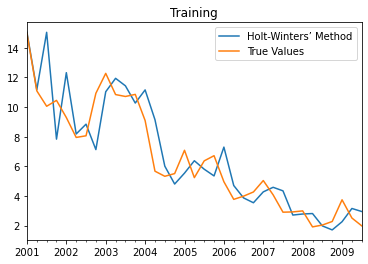

In [12]:
fit_hw = ExponentialSmoothing(tr_data, seasonal_periods=2, trend='add', seasonal='add').fit(use_boxcox=True)
ax = fit_hw.fittedvalues.plot()
tr_data.plot(ax = ax)
plt.legend(['Holt-Winters’ Method', 'True Values'])
plt.title('Training')
plt.show()

Holt-Winters’ Method 0.06807469940909533 8.91893171094269


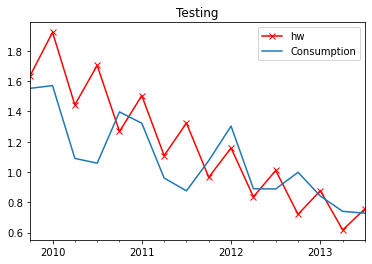

In [14]:
# MSE, MAPE, PLOT TESTING
fcast_hw = fit_hw.forecast(len(val_data)).rename('hw')
mse_hw = ((fcast_hw - val_data.Consumption) ** 2).mean()
mape = ((fcast_hw - val_data.Consumption))
for i in range(len(mape)):
    mape[i] = (mape[i]/val_data.Consumption[i])*100
print('Holt-Winters’ Method',mse_hw,mape.mean())
ax = fcast_hw.plot(color='red', marker="x", legend=True)
val_data.plot(ax=ax)
plt.title('Testing')
plt.show()

In [20]:
X_tr, X_val = X[:int(X.shape[0]*0.7)], X[int(X.shape[0]*0.7):]
y_tr, y_val = y[:int(y.shape[0]*0.7)], y[int(y.shape[0]*0.7):]

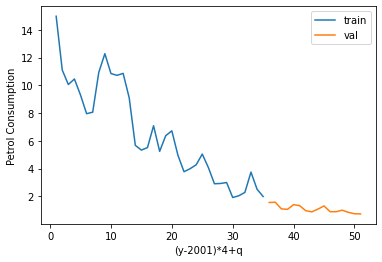

In [21]:
plt.plot(X_tr,y_tr)
plt.plot(X_val,y_val)
plt.legend(["train", "val"], loc ="best")
plt.xlabel('(y-2001)*4+q')
plt.ylabel('Petrol Consumption')
plt.show()